Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import os
#import tensorflow as tf
#import cv2
#from tensorflow import keras
#from tensorflow.keras import layers, Dense, Input, InputLayer, Flatten
#from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
from PIL import Image

In [3]:
def create_dataset_PIL(img_folder):
    
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= np.array(Image.open(image_path).convert('LA'))
            image= np.resize(image,(320,240,3))
            image = image.astype('float32')
            image /= 255  
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array , class_name
PIL_img_data, class_name=create_dataset_PIL('./flowers/')

In [4]:
imagearr=np.array(PIL_img_data)


In [16]:
imagearr[0]

array([[[0.5294118 , 0.5294118 , 0.52156866],
        [0.5411765 , 0.5411765 , 0.53333336],
        [0.5568628 , 0.5568628 , 0.5568628 ],
        ...,
        [0.5921569 , 0.6       , 0.59607846],
        [0.6       , 0.60784316, 0.6039216 ],
        [0.60784316, 0.6156863 , 0.6117647 ]],

       [[0.60784316, 0.6117647 , 0.61960787],
        [0.6156863 , 0.61960787, 0.627451  ],
        [0.627451  , 0.6313726 , 0.64705884],
        ...,
        [0.65882355, 0.6627451 , 0.67058825],
        [0.65882355, 0.6627451 , 0.67058825],
        [0.654902  , 0.65882355, 0.6666667 ]],

       [[0.64705884, 0.6509804 , 0.65882355],
        [0.6431373 , 0.6509804 , 0.64705884],
        [0.6431373 , 0.6509804 , 0.64705884],
        ...,
        [0.5529412 , 0.5568628 , 0.5372549 ],
        [0.56078434, 0.5647059 , 0.54509807],
        [0.57254905, 0.5764706 , 0.5568628 ]],

       ...,

       [[0.6313726 , 0.63529414, 0.654902  ],
        [0.627451  , 0.6313726 , 0.6509804 ],
        [0.627451  , 0

In [6]:
fname=np.array(class_name)
fname

array(['daisy', 'daisy', 'daisy', ..., 'tulip', 'tulip', 'tulip'],
      dtype='<U9')

In [7]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]
labels=np.array(target_val)
labels.ndim

1

In [8]:
img1=imagearr[1444]

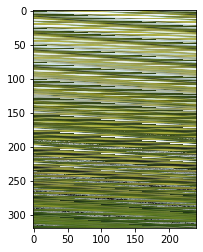

In [9]:
imgplot = plt.imshow(img1)

In [20]:
def shuffle_in_unison(a, b):
    assert len(a) == len(b)
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
    return shuffled_a, shuffled_b

In [67]:
simg, slabel=shuffle_in_unison(imagearr, labels)

In [69]:
print(slabel[0])
simg[0]

1


array([[[1.        , 1.        , 1.        ],
        [0.9843137 , 0.9843137 , 0.9843137 ],
        [0.9882353 , 0.9882353 , 0.9882353 ],
        ...,
        [0.99215686, 0.99215686, 0.99215686],
        [0.99215686, 0.99215686, 0.99215686],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [0.99215686, 0.99215686, 0.99215686]],

       [[0.9882353 , 0.9882353 , 0.9882353 ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [0.9882353 , 0.9882353 , 0.9882353 ]],

       ...,

       [[0.99607843, 1.        , 0.98039216],
        [1.        , 0.99607843, 1.        ],
        [1.        , 0

In [62]:
from tensorflow.keras.utils import to_categorical
#label= to_categorical(slabel)



In [70]:
train_data=simg[:2500]
test_data=simg[2500:]
train_label=slabel[:2500]
test_label=slabel[2500:]

In [71]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [79]:
network = models.Sequential()
network.add(layers.Dense(1500
                         ,activation='relu', input_shape=(
                             320,240,3
                                                         )))
network.add(layers.Dense(300, activation='relu'))
network.add(layers.Dense(5, activation='sigmoid'))
network.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [88]:
history=network.fit(train_data, train_label, epochs=5
                    ,batch_size=16)
             
             
            

Epoch 1/5


ResourceExhaustedError: OOM when allocating tensor with shape[1228800,1500] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node dense_54/Tensordot/MatMul}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [45]:
model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(320,240, 3)),
            tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(6)
        ])
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
history = model.fit(x=np.array(PIL_img_data, np.float32), y=np.array(list(map(int,target_val)), np.float32), epochs=5)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
4323/4323 [==============================] - 305s 70ms/sample - loss: 6.6876 - acc: 0.2413
Epoch 2/5
4323/4323 [==============================] - 156s 36ms/sample - loss: 6.7025 - acc: 0.2433
Epoch 3/5
4323/4323 [==============================] - 151s 35ms/sample - loss: 6.7025 - acc: 0.2433
Epoch 4/5
4323/4323 [==============================] - 151s 35ms/sample - loss: 6.7025 - acc: 0.2433
Epoch 5/5
4323/4323 [==============================] - 150s 35ms/sample - loss: 6.7025 - acc: 0.2433


In [ ]:
###

In [ ]:
plt.figure(figsize=(20,20))
test_folder=r'CV\Intel_Images\seg_train\seg_train\forest'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [ ]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder=r'CV\Intel_Images\seg_train\seg_train\'

In [ ]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r'CV\Intel_Images\seg_train\seg_train')

In [ ]:
target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict

In [ ]:
target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [ ]:
model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
            tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(6)
        ])
encoder.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x=np.array(img_data, np.float32), y=np.array(list(map(int,target_val)), np.float32), epochs=5)

In [3]:
###

In [7]:


def files(path):
    for file in os.listdir(path):
        if os.path.isfile(os.path.join(path, file)):
            yield file

for file in files("."):
    print (file)

.bash_history
.condarc
.gitconfig
.netrc
.node_repl_history
2 rings.cdx
classess.ipynb
dateprediction.csv
fa1.ipynb
Flowers_Recognition.ipynb
Gpa_calculator.spec
Ionosphere Assignment.ipynb
ionosphere_data.csv
Machine.py.ipynb
NTUSER.DAT
ntuser.dat.LOG1
ntuser.dat.LOG2
NTUSER.DAT{1b2f635f-5f78-11ea-8440-c0f02c6e1cc8}.TM.blf
NTUSER.DAT{1b2f635f-5f78-11ea-8440-c0f02c6e1cc8}.TMContainer00000000000000000001.regtrans-ms
NTUSER.DAT{1b2f635f-5f78-11ea-8440-c0f02c6e1cc8}.TMContainer00000000000000000002.regtrans-ms
ntuser.ini
numppy.ipynb
numpyq2.ipynb
practi.ipynb
python test key
q2 assignment 1.ipynb
ssss.ipynb
stream
Untitled.ipynb
untitled.txt
Untitled1.ipynb
untitled1.txt
Untitled2.ipynb
Untitled3.ipynb
Untitled4.ipynb
usa.psd
x.npx.npy
x.npy
x.npz.npy
xI]^½+WY2Ùê[!4!ééf}FA¨]úáHû´
xy.npy.npz
xy.npz
ÿæì
¢­IÕ
ä
î§z«ÈðÌ
ªâËYáKPàÈVR¦


In [22]:
import numpy as np
import pandas as pd

In [23]:
import os


for root in os.walk("./flowers/daisy"):
    for file1 in root:

        print(file1)
        
for root in os.walk("./flowers/dandelion"):
    for file2  in root:

        print(file2)
        
for root in os.walk("./flowers/rose"):
    for file3 in root:

        print(file3)
        
for root in os.walk("./flowers/sunflower"):
    for file4 in root:

        print(file4)
        
for root in os.walk("./flowers/tulip"):
    for file5 in root:

        print(file5)

./flowers/daisy
[]
['100080576_f52e8ee070_n.jpg', '10140303196_b88d3d6cec.jpg', '10172379554_b296050f82_n.jpg', '10172567486_2748826a8b.jpg', '10172636503_21bededa75_n.jpg', '102841525_bd6628ae3c.jpg', '10300722094_28fa978807_n.jpg', '1031799732_e7f4008c03.jpg', '10391248763_1d16681106_n.jpg', '10437754174_22ec990b77_m.jpg', '10437770546_8bb6f7bdd3_m.jpg', '10437929963_bc13eebe0c.jpg', '10466290366_cc72e33532.jpg', '10466558316_a7198b87e2.jpg', '10555749515_13a12a026e.jpg', '10555815624_dc211569b0.jpg', '10555826524_423eb8bf71_n.jpg', '10559679065_50d2b16f6d.jpg', '105806915_a9c13e2106_n.jpg', '10712722853_5632165b04.jpg', '107592979_aaa9cdfe78_m.jpg', '10770585085_4742b9dac3_n.jpg', '10841136265_af473efc60.jpg', '10993710036_2033222c91.jpg', '10993818044_4c19b86c82.jpg', '10994032453_ac7f8d9e2e.jpg', '11023214096_b5b39fab08.jpg', '11023272144_fce94401f2_m.jpg', '11023277956_8980d53169_m.jpg', '11124324295_503f3a0804.jpg', '1140299375_3aa7024466.jpg', '11439894966_dca877f0cd.jpg', '115

In [24]:
def printlen(f1,f2,f3,f4,f5):
    print(len(f1))
    print(len(f2))
    print(len(f3))
    print(len(f4))
    print(len(f5))
    print(len(f1+f2+f3+f4+f5))
    
printlen(file1,file2,file3,file4,file5)


769
1055
784
734
984
4326


In [2]:
daisy=np.array(file1)
dandelion=np.array(file2)
rose=np.array(file3)
sunflower=np.array(file4)
tulip=np.array(file5)
daisy[0]

NameError: name 'np' is not defined

In [1]:

def labels(file):
    labellist=[]
    for i in file:
        if i!=0:
        #rint(i)
            labellist+=i
        
        
    print(labellist)
    print(len(labellist))
    
labels(daisy)

NameError: name 'daisy' is not defined

In [36]:
flowerdata= {1:file1,2:file2,3:file3,4:file4,5:file5}

flowers=pd.DataFrame(flowerdata)
             
flowers

ValueError: arrays must all be same length